# Project 2 Section 2
Importing the C/D dataset and defining the train and validation dataset

In [1]:
import tensorflow as tf
import os

# Download the cats & dogs file from a URL with tf.keras.utils.get_file() method
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# get the directory of the file with the os.path.dirname() method, which is /root/keras/datasets
zip_file = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

#combine the paths of the file into one PATH by using the os.path.join() method
PATH = os.path.join(os.path.dirname(zip_file), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                             validation_split=0.3,
                                             subset="training",
                                             seed = 123,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 2000 files belonging to 2 classes.
Using 1400 files for training.


In [4]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                             validation_split=0.3,
                                             subset="validation",
                                             seed = 123,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 1000 files belonging to 2 classes.
Using 300 files for validation.


Check classes names

In [5]:
class_names = train_dataset.class_names
print(class_names)

['cats', 'dogs']


# Import 2 different pre trained convolutional base models
to be then connected to the fully connected classifier

In [6]:
inception_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

In [7]:
resnet_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the base models

In [8]:
inception_model.trainable = False
resnet_model.trainable = False

# Defining the fully-connected classifier
to be defined the structure of the fully connected NN on top of the convolutional pre-trained model

In [9]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, Rescaling

inputs = tf.keras.Input(shape = (224, 224, 3))
x_resnet = Rescaling(scale = 1./127.5, offset = -1)(inputs)
x_inception = Rescaling(scale = 1./127.5, offset = -1)(inputs)

In [10]:
x_resnet = resnet_model(x_resnet, training = False)
x_inception = inception_model(x_inception, training = False)

In [11]:
x_resnet = tf.keras.layers.GlobalAveragePooling2D()(x_resnet)
x_inception = tf.keras.layers.GlobalAveragePooling2D()(x_inception)

In [12]:
outputs_resnet = tf.keras.layers.Dense(1, activation ='sigmoid')(x_resnet)
outputs_inception = tf.keras.layers.Dense(1, activation ='sigmoid')(x_inception)

In [13]:
resnet_model_final = tf.keras.Model(inputs, outputs_resnet)
inception_model_final = tf.keras.Model(inputs, outputs_inception)

# Display the 2 models structure
check the trainability and the layer structure of the 2 built CNN models

In [14]:
resnet_model_final.summary(show_trainable=True)

Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         Y          
                                                                            
 rescaling (Rescaling)       (None, 224, 224, 3)       0         Y          
                                                                            
 resnet50 (Functional)       (None, 7, 7, 2048)        2358771   N          
                                                       2                    
                                                                            
 global_average_pooling2d (  (None, 2048)              0         Y          
 GlobalAveragePooling2D)                                                    
                                                                            
 dense (Dense)               (None, 1)                 2049  

In [15]:
inception_model_final.summary(show_trainable=True)

Model: "model_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         Y          
                                                                            
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         Y          
                                                                            
 inception_v3 (Functional)   (None, 5, 5, 2048)        2180278   N          
                                                       4                    
                                                                            
 global_average_pooling2d_1  (None, 2048)              0         Y          
  (GlobalAveragePooling2D)                                                  
                                                                            
 dense_1 (Dense)             (None, 1)                 2049

# Train ResNet model
compile and train with adam optimizer and banary cross entropy loss function. 20 epochs defined with early exit

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

resnet_model_final.compile(optimizer= 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits= False),
              metrics=['accuracy'])
history_resnet = resnet_model_final.fit(train_dataset,
                    epochs = 20,
                    callbacks=[earlyStopping],
                    validation_data=validation_dataset)


Epoch 1/20


44/44 [==============================] - 90s 2s/step - loss: 0.6767 - accuracy: 0.5529 - val_loss: 0.6497 - val_accuracy: 0.6167
Epoch 2/20
44/44 [==============================] - 93s 2s/step - loss: 0.6496 - accuracy: 0.6107 - val_loss: 0.6292 - val_accuracy: 0.6500
Epoch 3/20
44/44 [==============================] - 99s 2s/step - loss: 0.6368 - accuracy: 0.6364 - val_loss: 0.6246 - val_accuracy: 0.6667
Epoch 4/20
44/44 [==============================] - 98s 2s/step - loss: 0.6320 - accuracy: 0.6529 - val_loss: 0.6246 - val_accuracy: 0.6533
Epoch 5/20
44/44 [==============================] - 95s 2s/step - loss: 0.6288 - accuracy: 0.6607 - val_loss: 0.6180 - val_accuracy: 0.6767
Epoch 6/20
44/44 [==============================] - 93s 2s/step - loss: 0.6235 - accuracy: 0.6643 - val_loss: 0.6163 - val_accuracy: 0.6633
Epoch 7/20
44/44 [==============================] - 92s 2s/step - loss: 0.6170 - accuracy: 0.6679 - val_loss: 0.6118 - val_accuracy: 0.6700
Epoch 8/20
44/44 

# evaluation on validation data set

In [17]:
model_evaluation = resnet_model_final.evaluate(validation_dataset)

10/10 [==============================] - 16s 2s/step - loss: 0.6116 - accuracy: 0.6800


# evaluation on train data set

In [18]:
model_evaluation = resnet_model_final.evaluate(train_dataset)

44/44 [==============================] - 75s 2s/step - loss: 0.6110 - accuracy: 0.6629


# Graphs - loss

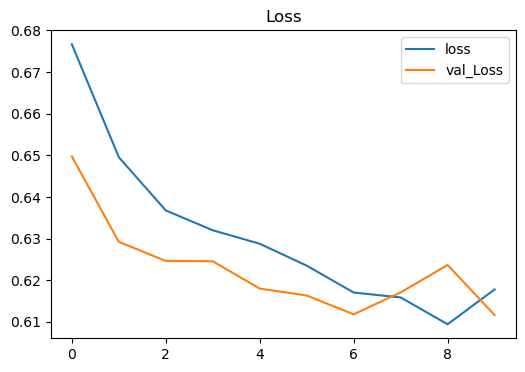

In [19]:
import matplotlib.pyplot as plt

loss_resnet = history_resnet.history['loss']
val_loss_resnet = history_resnet.history['val_loss']

plt.figure(figsize=(6, 4))
plt.plot(history_resnet.history['loss'], label='loss')
plt.plot(history_resnet.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()

# Train Inception model
same parameters as for the ResNet

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

inception_model_final.compile(optimizer= 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits= False),
              metrics=['accuracy'])
history_inception = inception_model_final.fit(train_dataset,
                    epochs = 20,
                    callbacks=[earlyStopping],
                    validation_data=validation_dataset)

Epoch 1/20
44/44 [==============================] - 43s 852ms/step - loss: 0.2427 - accuracy: 0.9214 - val_loss: 0.0791 - val_accuracy: 0.9867
Epoch 2/20
44/44 [==============================] - 36s 826ms/step - loss: 0.0678 - accuracy: 0.9850 - val_loss: 0.0548 - val_accuracy: 0.9833
Epoch 3/20
44/44 [==============================] - 36s 813ms/step - loss: 0.0470 - accuracy: 0.9864 - val_loss: 0.0459 - val_accuracy: 0.9833
Epoch 4/20
44/44 [==============================] - 35s 806ms/step - loss: 0.0365 - accuracy: 0.9914 - val_loss: 0.0413 - val_accuracy: 0.9867
Epoch 5/20
44/44 [==============================] - 36s 819ms/step - loss: 0.0281 - accuracy: 0.9929 - val_loss: 0.0391 - val_accuracy: 0.9867
Epoch 6/20
44/44 [==============================] - 36s 822ms/step - loss: 0.0225 - accuracy: 0.9943 - val_loss: 0.0406 - val_accuracy: 0.9833
Epoch 7/20
44/44 [==============================] - 39s 878ms/step - loss: 0.0196 - accuracy: 0.9964 - val_loss: 0.0369 - val_accuracy: 0.9867

# evaluate with validation data set

In [21]:
model_evaluation = inception_model_final.evaluate(validation_dataset)

10/10 [==============================] - 6s 602ms/step - loss: 0.0344 - accuracy: 0.9867


# evaluate with train data set

In [22]:
model_evaluation = inception_model_final.evaluate(train_dataset)

44/44 [==============================] - 29s 645ms/step - loss: 0.0091 - accuracy: 1.0000


# Graph - loss

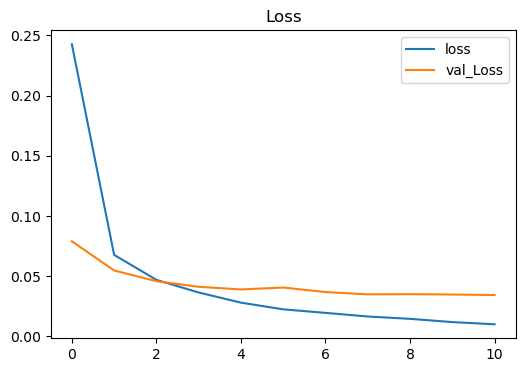

In [23]:
loss_inception = history_inception.history['loss']
val_loss_inception = history_inception.history['val_loss']

plt.figure(figsize=(6, 4))
plt.plot(history_inception.history['loss'], label='loss')
plt.plot(history_inception.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()

# Section 3
unfreze the CNN pre-trained model

In [24]:
inception_model.trainable = True
resnet_model.trainable = True

# Check layers numbers

In [25]:
len(inception_model.layers)

311

In [26]:
len(resnet_model.layers)

175

 # Freezing only a portion of layers

In [27]:
inception_tune = 250
resnet_tune = 150

In [28]:
for layer in inception_model.layers[0:inception_tune]:
  layer.trainable = False

for layer in resnet_model.layers[0:resnet_tune]:
  layer.trainable = False

# Recompiling the model

In [29]:
inception_model_final.compile(optimizer= 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits= False),
              metrics=['accuracy'])

In [30]:
resnet_model_final.compile(optimizer= 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits= False),
              metrics=['accuracy'])

# Resume training - inception model
from previous epochs work further

In [31]:
history_inception_final = inception_model_final.fit(train_dataset,
                    epochs = 30,
                    callbacks=[earlyStopping],
                    validation_data=validation_dataset)

Epoch 1/30
44/44 [==============================] - 51s 1s/step - loss: 1.1910 - accuracy: 0.9450 - val_loss: 0.1509 - val_accuracy: 0.9733
Epoch 2/30
44/44 [==============================] - 43s 987ms/step - loss: 0.0450 - accuracy: 0.9850 - val_loss: 0.0135 - val_accuracy: 0.9933
Epoch 3/30
44/44 [==============================] - 43s 989ms/step - loss: 0.0220 - accuracy: 0.9914 - val_loss: 0.0116 - val_accuracy: 0.9933
Epoch 4/30
44/44 [==============================] - 43s 978ms/step - loss: 0.0348 - accuracy: 0.9921 - val_loss: 0.0230 - val_accuracy: 0.9900
Epoch 5/30
44/44 [==============================] - 43s 979ms/step - loss: 0.0492 - accuracy: 0.9950 - val_loss: 0.4072 - val_accuracy: 0.9667
Epoch 6/30
44/44 [==============================] - 43s 989ms/step - loss: 0.0896 - accuracy: 0.9779 - val_loss: 0.0620 - val_accuracy: 0.9867


In [32]:
model_evaluation = inception_model_final.evaluate(validation_dataset)

10/10 [==============================] - 6s 576ms/step - loss: 0.0620 - accuracy: 0.9867


In [33]:
model_evaluation = inception_model_final.evaluate(train_dataset)

44/44 [==============================] - 28s 627ms/step - loss: 0.0457 - accuracy: 0.9900


# Visualize the loss value
sum of losses

In [34]:
loss_inception += history_inception_final.history['loss']
val_loss_inception += history_inception_final.history['val_loss']

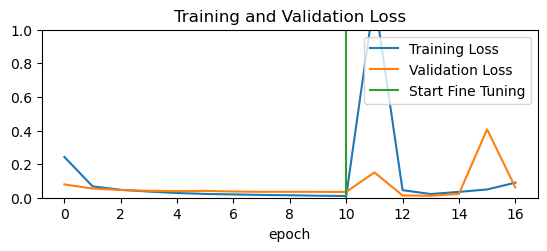

In [37]:
plt.subplot(2, 1, 2)
plt.plot(loss_inception, label='Training Loss')
plt.plot(val_loss_inception, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([10,10],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Make predictions
evaluate predictive ability of the inception model

In [39]:
images, labels = validation_dataset.as_numpy_iterator().next()
predictions = inception_model_final.predict_on_batch(images).flatten()

In [40]:
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', labels)

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0]


# Resume training - resnet model

In [42]:
history_resnet_final = resnet_model_final.fit(train_dataset,
                    epochs = 30,
                    callbacks=[earlyStopping],
                    validation_data=validation_dataset)

Epoch 1/30
44/44 [==============================] - 102s 2s/step - loss: 0.6871 - accuracy: 0.5514 - val_loss: 0.6679 - val_accuracy: 0.5833
Epoch 2/30
44/44 [==============================] - 97s 2s/step - loss: 0.6313 - accuracy: 0.6521 - val_loss: 0.6024 - val_accuracy: 0.6633
Epoch 3/30
44/44 [==============================] - 97s 2s/step - loss: 0.6492 - accuracy: 0.6236 - val_loss: 0.6405 - val_accuracy: 0.6300
Epoch 4/30
44/44 [==============================] - 101s 2s/step - loss: 0.6199 - accuracy: 0.6429 - val_loss: 0.5925 - val_accuracy: 0.6633
Epoch 5/30
44/44 [==============================] - 97s 2s/step - loss: 0.5991 - accuracy: 0.6757 - val_loss: 0.6039 - val_accuracy: 0.6633
Epoch 6/30
44/44 [==============================] - 97s 2s/step - loss: 0.6051 - accuracy: 0.6757 - val_loss: 0.5865 - val_accuracy: 0.7100
Epoch 7/30
44/44 [==============================] - 97s 2s/step - loss: 0.5781 - accuracy: 0.7107 - val_loss: 0.5650 - val_accuracy: 0.7000
Epoch 8/30
44/44 [

In [43]:
model_evaluation = resnet_model_final.evaluate(validation_dataset)

10/10 [==============================] - 16s 1s/step - loss: 0.5570 - accuracy: 0.7200


In [44]:
model_evaluation = resnet_model_final.evaluate(train_dataset)

44/44 [==============================] - 69s 2s/step - loss: 0.4685 - accuracy: 0.7579


# Visualize the loss value

In [45]:
loss_resnet += history_resnet_final.history['loss']
val_loss_resnet += history_resnet_final.history['val_loss']

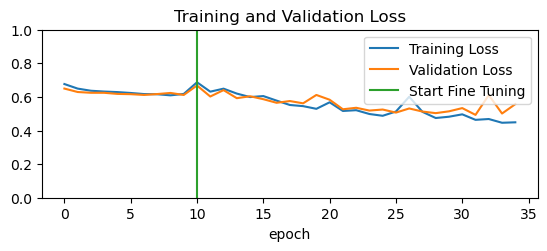

In [46]:
plt.subplot(2, 1, 2)
plt.plot(loss_resnet, label='Training Loss')
plt.plot(val_loss_resnet, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([10,10],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Make predictions

In [48]:
images, labels = validation_dataset.as_numpy_iterator().next()
predictions_resnet = resnet_model_final.predict_on_batch(images).flatten()

In [49]:
predictions_resnet = tf.nn.sigmoid(predictions_resnet)
predictions_resnet = tf.where(predictions_resnet < 0.5, 0, 1)

print('Predictions:\n', predictions_resnet.numpy())
print('Labels:\n', labels)

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1]
